In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import sys
warnings.filterwarnings('ignore')

In [178]:
# importing scripts

from scripts.data_visualization import Data_Viz 
from scripts.data_cleaning import DataCleaner

DC = DataCleaner()
DV = Data_Viz()

In [179]:
#loading data
train_data = pd.read_csv('../data/train_store.csv')
test_data = pd.read_csv('../data/test_store.csv')

 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [180]:
from matplotlib.offsetbox import AnchoredText
test_promo_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
train_promo_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])
print(f'There are {test_promo_percentage:.2%} of promotion in the test data set ')
print(f'There are {train_promo_percentage:.2%} of promotion in the train data set ')


There are 39.58% of promotion in the test data set 
There are 38.15% of promotion in the train data set 


In [181]:
#promo data frame for visualization for test and train 
promo_test_df = test_data['Promo'].value_counts()
promo_train_df = train_data['Promo'].value_counts()
test_df = pd.DataFrame(promo_test_df)
train_df = pd.DataFrame(promo_train_df)

In [182]:
#Remaming columing for visualization
promo = [0,1]
test_df['Promotion'] = promo
train_df['Promotion'] = promo
train_df.rename(columns={'Promo' : 'Count'}, inplace=True)
test_df.rename(columns={'Promo' : 'Count'}, inplace=True)


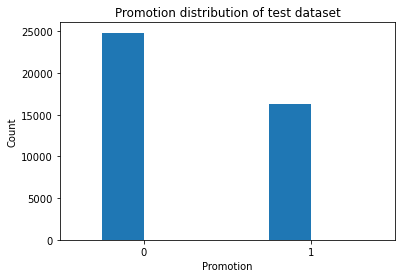

In [183]:
# Plotting the test promo distribution 

test_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of test dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/test_dataset_promo_distribution.jpg')
plt.show()

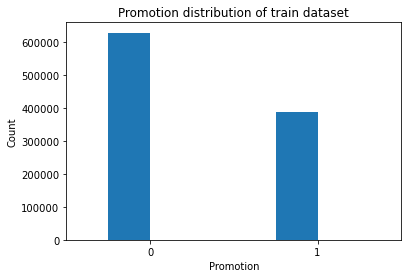

In [184]:
# Plotting the train promo distribution 

train_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of train dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/train_dataset_promo_distribution.jpg')
plt.show()

According the above graphs its seems distribution in both train and test dataset are

 Check & compare sales behavior before, during and after holidays

In [185]:
# Finding out the state holiday field

train_data['StateHoliday'].value_counts().index.tolist()

['0', 0, 'a', 'b', 'c']

In [186]:
# Changing all the fields of the state holiday into string

train_data['StateHoliday'] = train_data['StateHoliday'].values.astype(str)
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

In [187]:
# Changing the state holiday fields to easy understandable names
 
train_data['StateHoliday'].replace({'0':'No Holiday','a':'Public Holiday','b':'Easter Holiday','c':'Christmas Holiday'},inplace=True)
# Echecking the changes 
train_data['StateHoliday'].value_counts().index.tolist()



['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [188]:
# Ensuring if the train data column values has changed

train_data['StateHoliday'].value_counts().index.tolist()


['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [189]:
def convert_to_datetime( df, columns):
        """
        convert to datetime.
        """
        for col in columns:
            df[col] = pd.to_datetime(df[col])


In [190]:
# Separating the date column for further analysis

convert_to_datetime(train_data, columns=['Date'])
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)
# Identifying if the day is weekend or weekday
train_data['Weekday'] = train_data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1) 


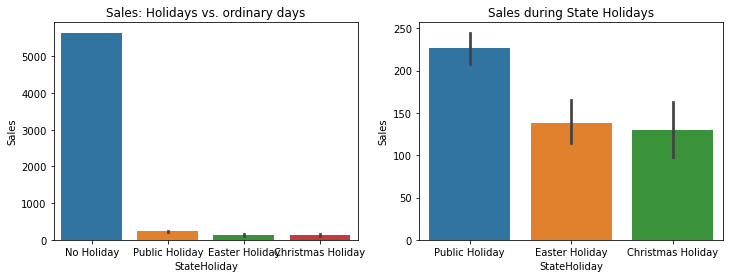

In [194]:
# comparing holiday day sales with non Holiday ones

holidays = train_data.loc[train_data["StateHoliday"] != 'No Holiday']

titles = ['Sales: Holidays vs. ordinary days', 'Sales during State Holidays']
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x="StateHoliday", y="Sales", data=train_data, ax=axis1).set_title(titles[0])
sns.barplot(x="StateHoliday", y="Sales", data=holidays, ax=axis2).set_title(titles[1])
plt.show()

 Find out any seasonal (Christmas, Easter etc) purchase behaviours

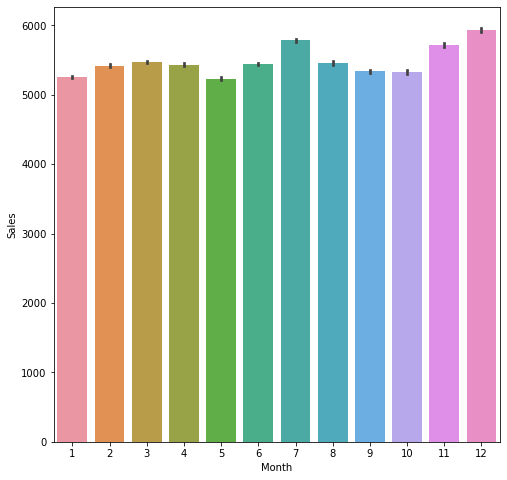

In [195]:
#seasonality check
plt.figure(figsize=(8,8))
sns.barplot(x='Month', y='Sales', data=train_data)
plt.show()


In [199]:
train_data['Date'] = pd.to_datetime(train_data["Date"])
DV.summ_columns(train_data)
train_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,Weekday
0,1,5,2015-07-31,5263.0,555.0,1,1,No Holiday,1,c,...,9.0,2008.0,0,Not Available,Not Available,Not Available,2015,7,31,1
1,2,5,2015-07-31,6064.0,625.0,1,1,No Holiday,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,1
2,3,5,2015-07-31,8314.0,821.0,1,1,No Holiday,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,1


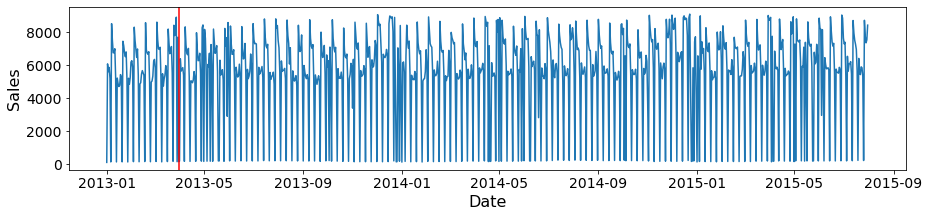

In [201]:
#Checking easter holidays from 2013-2015
train_filter =train_data.loc[(train_data["Year"]==2013) & (train_data["Month"]> 3) & train_data["Month"]> 5]
date_plot= train_data.groupby(["Date"]).agg({"Sales": "mean"})

plt.figure(figsize=(15, 3))
sns.lineplot(x="Date", y="Sales", data=date_plot)
plt.axvline(pd.Timestamp('2013-03-31'),color='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

-It can be seen in comparision no holiday has more purchase .
-Purchase behaviour between state holidays and public holiday: public holidays have more purchase,
- while christmas has the  small purchase
sales on easter day 


5. What can you say about the correlation between sales and number of customers?


<AxesSubplot:>

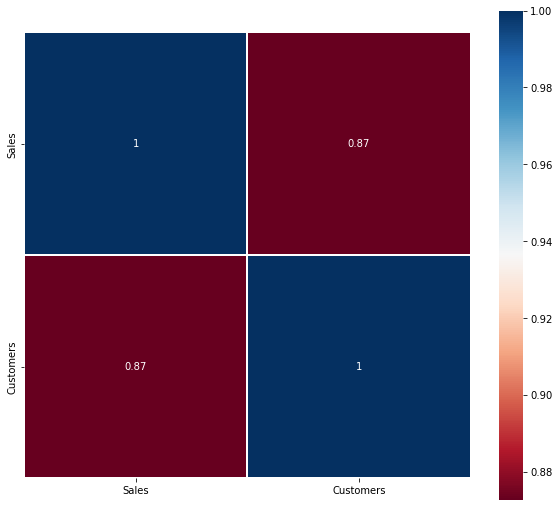

In [202]:
sales_customers = train_data[['Sales', 'Customers']]
plt.figure(figsize=(10,9))
sns.heatmap(sales_customers.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)


High correlation between number of customers and the sales.

 How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

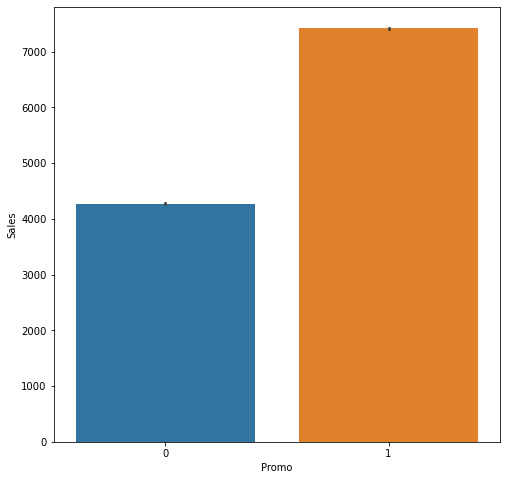

In [209]:
# salses count during promotion and without

plt.figure(figsize=(8, 8))
sns.barplot(x="Promo", y="Sales", data=train_data)

Promotion affects the sales in a positive way, the increase to promotion leads to increase in sales.

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

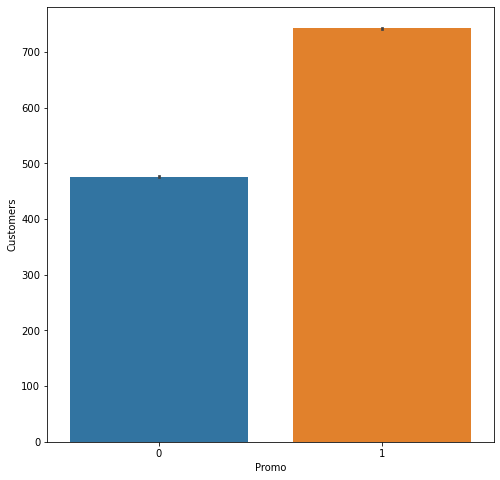

In [210]:
# checking average number of customers and existence of promotion

plt.figure(figsize=(8, 8))
sns.barplot(x="Promo", y="Customers", data=train_data)

Promo deployment need

In [212]:
table = train_data.groupby(["StoreType"]).agg({"Promo": 'mean', "Sales": "mean"}).reset_index()
table

,StoreType,Promo,Sales
0,a,0.381606,5388.581349
1,b,0.381933,7446.566203
2,c,0.381789,5485.973151
3,d,0.381213,5507.903922


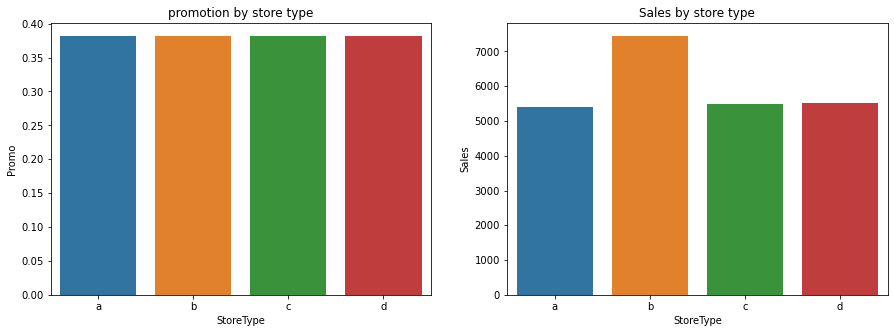

In [213]:
fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="StoreType", y="Promo", data=table, ax=axi1).set_title("promotion by store type")
sns.barplot(x="StoreType", y="Sales", data=table, ax=axi2).set_title("Sales by store type")
plt.show()

promotion distribution accross the storeTypes is similar. but D is slightly lower
So promos can be deployed more in d type stores but also in a and c.

Competition distance and sales

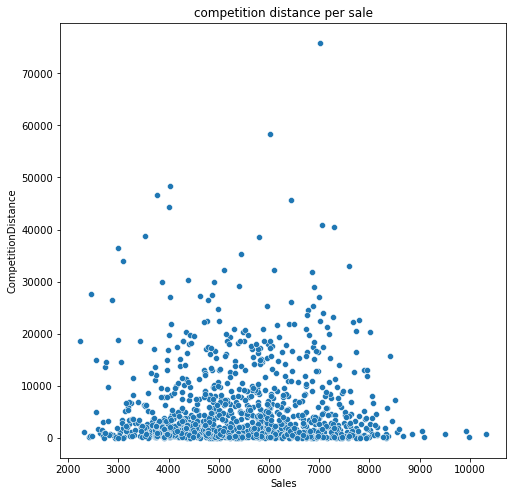

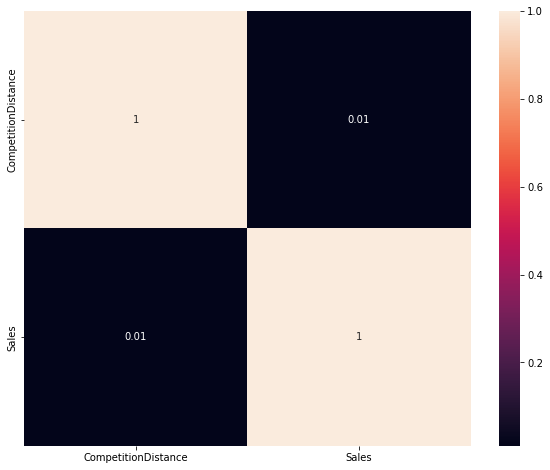

In [214]:
table2 = train_data.groupby("Store").agg({"CompetitionDistance": 'mean', "Sales": 'mean'})
plt.figure(figsize=(8,8))
sns.scatterplot(x="Sales", y="CompetitionDistance", data=table2).set_title("competition distance per sale")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(table2.corr(), annot=True)
plt.show()

The is no significant positive or negative correlation between competition distance and the sales

 Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [207]:
# stores that are open on weekends
closed_stores_df = train_data.loc[((train_data["Open"] == 0) & (train_data["Weekday"] == 0))]

closed_stores = closed_stores_df["Store"].value_counts().index.to_list()
stores_lis = train_data["Store"].value_counts().index.to_list()
open_stores = []

for x in stores_lis: 
    if (x not in closed_stores):
        open_stores.append(x)

print(f" The number of stores is {len(stores_lis)}, and the number of closed stores is {len(closed_stores)}")

print(f'Therefore the open store on weekdays are:{open_stores}')

 The number of stores is 1115, and the number of closed stores is 1105
Therefore the open store on weekdays are:[733, 682, 769, 562, 1097, 262, 85, 423, 335, 494]


per-store sales for open stores:  8226.255307855627
Per-store sales for closed stores:  5444.65615322255


<AxesSubplot:xlabel='Stores', ylabel='Sales'>

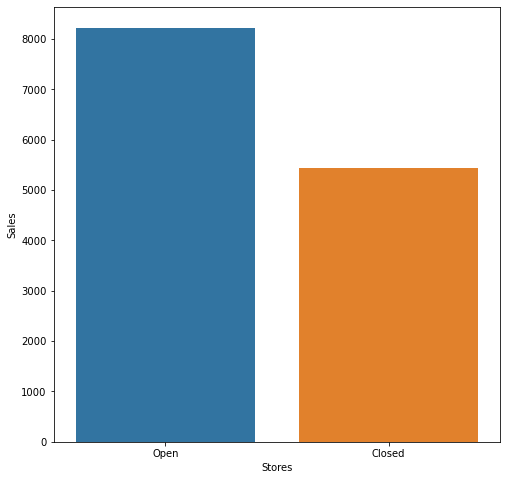

In [208]:
open_stores_df = train_data.loc[train_data["Store"].isin(open_stores)]
closed_stores_df = train_data.loc[train_data["Store"].isin(closed_stores)]

# sales in the weekend

print("per-store sales for open stores: ", (open_stores_df["Sales"].mean()))
print("Per-store sales for closed stores: ", (closed_stores_df["Sales"].mean()))

sales_weekday = {"Stores":["Open", "Closed"], "Sales":[open_stores_df["Sales"].mean(), closed_stores_df["Sales"].mean()]}
plt.figure(figsize=(8,8))
sns.barplot(x = "Stores", y = "Sales", data= pd.DataFrame(sales_weekday))


-1115-1105 = 10 : 10 stores are open on weekdays
-The open stores on weekdays have better sales than those that aren't


Check how the assortment type affects sales


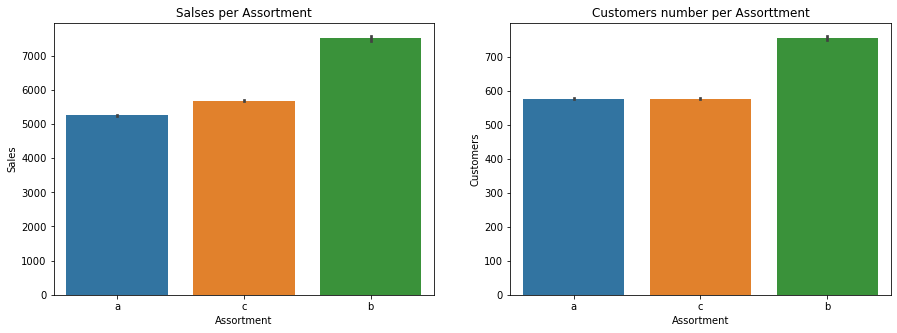

In [215]:
fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="Assortment", y="Sales", data=train_data, ax=axi1).set_title("Salses per Assortment")
sns.barplot(x="Assortment", y="Customers", data=train_data, ax=axi2).set_title("Customers number per Assorttment")
plt.show()

As shown above the "b" assortment has the highest customers and sales.